Compute bed shear stress at Wellfleet Harbor site 1121 using Soulsby, DATA2 method

In [1]:
import xarray as xr
import hvplot.xarray
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%run -i sedfuncs.py

#import djnpy 
#cd ..\..\djnpy

In [2]:
cd C:\Users\rallen\Projects\USGS\WellfleetHarbor\CACO\wellfleet_timeseries_ncfiles

C:\Users\rallen\Projects\USGS\WellfleetHarbor\CACO\wellfleet_timeseries_ncfiles


In [3]:
# set some parameters arbitrarily - need to check these!
# z0 = 0.001 # m, roughness length of hydrodynamically rough bed
rho = 1027 # kg m-3, water density

d50 = 500*1e-6 # m, try at the lower end of the range
d50 = 1000*1e-6 # m, try at the upper end of the range
ks = 2.5*d50 #eq 24, m
# and z0 = ks/30*(1-exp(-u*ks/27nu))+(nu/9u*) (eq 23a)

In [4]:
# load aquadopp from channel site
aqd = xr.load_dataset('11211Aaqd-a_flux.nc') # "flux" version has rotated and depth -average velocities


In [5]:
aqd

<xarray.Dataset> Size: 37MB
Dimensions:                  (z: 38, time: 9110, bindist: 38, latitude: 1,
                              longitude: 1, depth: 38)
Coordinates:
  * z                        (z) float64 304B -1.85 -1.75 -1.65 ... 1.75 1.85
  * time                     (time) datetime64[ns] 73kB 2018-11-12T16:46:00 ....
  * bindist                  (bindist) float64 304B 0.2 0.3 0.4 ... 3.7 3.8 3.9
  * latitude                 (latitude) float64 8B 41.92
  * longitude                (longitude) float64 8B -70.06
  * depth                    (depth) float64 304B 1.748 1.648 ... -1.852 -1.952
Data variables: (12/29)
    Bat_106                  (time) float64 73kB 10.9 10.9 10.9 ... 10.7 10.7
    Hdg_1215                 (time) float64 73kB 141.3 141.5 ... 140.8 141.2
    Ptch_1216                (time) float64 73kB 0.8 0.7 0.7 0.7 ... 0.5 0.5 0.6
    Roll_1217                (time) float64 73kB 3.0 3.0 3.0 2.9 ... 2.8 3.0 2.7
    P_1                      (time) float64 73kB 2.473 2.593 ... 3.033 2.913
    Tx_1211                  (time) float64 73kB 8.1 8.16 8.21 ... 0.91 0.99
    ...                       ...
    daal                     (time) float64 73kB 0.06729 0.07954 ... -0.1023
    ac                       (time, z) float64 3MB -0.003003 -0.03776 ... nan
    al                       (time, z) float64 3MB 0.06365 0.03469 ... nan nan
    water_depth              (time) float64 73kB 2.283 2.403 ... 2.995 2.875
    ssf                      (time) float64 73kB 0.001017 ... -0.0007827
    cssf                     (time) float64 73kB 0.9154 2.317 ... -1.101e+04
Attributes: (12/119)
    title:                            Time-series measurements of oceanograph...
    SciPi:                            N. Ganju
    PROJECT:                          USGS Coastal and Marine Hazards and Res...
    EXPERIMENT:                       NRPP Cape Cod
    DESCRIPTION:                      Outer Channel site, Herring River, Well...
    DATA_SUBTYPE:                     MOORED
    ...                               ...
    center_first_bin:                 0.2
    instrument_type:                  Nortek Aquadopp Profiler
    nominal_instrument_depth:         1.94
    DELTA_T:                          900
    start_time:                       2018-11-12T16:46:00.000000000
    stop_time:                        2019-02-15T14:01:00.000000000

In [6]:
# load waves from channel site
waves = xr.load_dataset('11213Adws-a.nc')


In [7]:
waves

<xarray.Dataset> Size: 80MB
Dimensions:      (time: 4557, sample: 4096, z: 1, depth: 1, latitude: 1,
                  longitude: 1, frequency: 129)
Coordinates:
  * time         (time) datetime64[ns] 36kB 2018-11-12T16:00:00 ... 2019-02-1...
  * z            (z) float64 8B -2.06
  * depth        (depth) float64 8B 1.97
  * latitude     (latitude) float64 8B 41.92
  * longitude    (longitude) float64 8B -70.06
  * frequency    (frequency) float64 1kB 0.0 0.01562 0.03125 ... 1.969 1.984 2.0
Dimensions without coordinates: sample
Data variables:
    burst        (time, sample) int32 75MB 33 33 33 33 ... 4589 4589 4589 4589
    wp_peak      (time) float64 36kB nan nan 1.829 nan ... 2.783 2.909 3.048 nan
    wh_4061      (time) float64 36kB nan nan 0.03318 nan ... 0.0466 0.05894 nan
    wp_4060      (time) float64 36kB nan nan 1.287 nan ... 1.885 1.778 1.853 nan
    pspec        (time, frequency) float64 5MB 2.533e-07 0.0001056 ... nan nan
    water_depth  (time) float64 36kB 1.914 2.172 2.429 2.737 ... 3.262 3.053 nan
Attributes: (12/51)
    title:                            Time-series measurements of oceanograph...
    SciPi:                            N. Ganju
    PROJECT:                          USGS Coastal and Marine Hazards and Res...
    EXPERIMENT:                       NRPP Cape Cod
    DESCRIPTION:                      Outer Channel site, Herring River, Well...
    DATA_SUBTYPE:                     MOORED
    ...                               ...
    sample_interval:                  0.25
    burst_interval:                   1800.0
    samples_per_burst:                4096
    nominal_instrument_depth:         1.9499999999999997
    start_time:                       2018-11-12T16:00:00.000000000
    stop_time:                        2019-02-15T14:00:00.000000000

In [8]:
# interpolate waves data to aqd 
aqd['wp_peak'] = waves.wp_peak.interp(time=aqd.time)
aqd['wp_4060'] = waves.wp_4060.interp(time=aqd.time)
aqd['wh_4061'] = waves.wh_4061.interp(time=aqd.time)
aqd

<xarray.Dataset> Size: 37MB
Dimensions:                  (z: 38, time: 9110, bindist: 38, latitude: 1,
                              longitude: 1, depth: 38)
Coordinates:
  * z                        (z) float64 304B -1.85 -1.75 -1.65 ... 1.75 1.85
  * time                     (time) datetime64[ns] 73kB 2018-11-12T16:46:00 ....
  * bindist                  (bindist) float64 304B 0.2 0.3 0.4 ... 3.7 3.8 3.9
  * latitude                 (latitude) float64 8B 41.92
  * longitude                (longitude) float64 8B -70.06
  * depth                    (depth) float64 304B 1.748 1.648 ... -1.852 -1.952
Data variables: (12/32)
    Bat_106                  (time) float64 73kB 10.9 10.9 10.9 ... 10.7 10.7
    Hdg_1215                 (time) float64 73kB 141.3 141.5 ... 140.8 141.2
    Ptch_1216                (time) float64 73kB 0.8 0.7 0.7 0.7 ... 0.5 0.5 0.6
    Roll_1217                (time) float64 73kB 3.0 3.0 3.0 2.9 ... 2.8 3.0 2.7
    P_1                      (time) float64 73kB 2.473 2.593 ... 3.033 2.913
    Tx_1211                  (time) float64 73kB 8.1 8.16 8.21 ... 0.91 0.99
    ...                       ...
    water_depth              (time) float64 73kB 2.283 2.403 ... 2.995 2.875
    ssf                      (time) float64 73kB 0.001017 ... -0.0007827
    cssf                     (time) float64 73kB 0.9154 2.317 ... -1.101e+04
    wp_peak                  (time) float64 73kB nan nan nan nan ... nan nan nan
    wp_4060                  (time) float64 73kB nan nan nan nan ... nan nan nan
    wh_4061                  (time) float64 73kB nan nan nan nan ... nan nan nan
Attributes: (12/119)
    title:                            Time-series measurements of oceanograph...
    SciPi:                            N. Ganju
    PROJECT:                          USGS Coastal and Marine Hazards and Res...
    EXPERIMENT:                       NRPP Cape Cod
    DESCRIPTION:                      Outer Channel site, Herring River, Well...
    DATA_SUBTYPE:                     MOORED
    ...                               ...
    center_first_bin:                 0.2
    instrument_type:                  Nortek Aquadopp Profiler
    nominal_instrument_depth:         1.94
    DELTA_T:                          900
    start_time:                       2018-11-12T16:46:00.000000000
    stop_time:                        2019-02-15T14:01:00.000000000

In [9]:
# calculate wavenumber
T = aqd.wp_peak # based on Soulsby page 69, wp_peak is the value to use
wr = 2.*np.pi/T
wr
aqd['kh'] = qkhfs(wr,aqd.water_depth)
print('kh: {:.3f}, k: {:.3f} m-1'.format(aqd.kh[1000], aqd.kh[1000]/aqd.water_depth[1000]))

kh: 2.958, k: 0.916 m-1


In [10]:
# calculate wave-orbital velocity from Hs, T, h
aqd['ubr'] = ub_func(T,aqd.kh/aqd.water_depth,aqd.wh_4061,aqd.water_depth)
print('ub: {:.3f} m/s'.format(aqd.ubr[1000]))

ub: 0.022 m/s


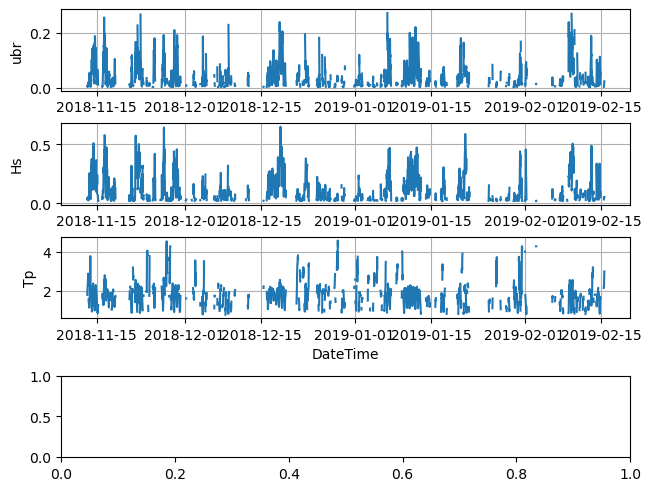

In [11]:
fig,axs = plt.subplots(4,1,layout='constrained')
axs[0].plot(aqd.time,aqd.ubr)
axs[0].set_ylabel('ubr')
axs[0].grid(True)
axs[1].plot(aqd.time,aqd.wh_4061)
axs[1].set_ylabel('Hs')
axs[1].grid(True)
axs[2].plot(aqd.time,aqd.wp_peak)
axs[2].set_xlabel('DateTime')
axs[2].set_ylabel('Tp')
axs[2].grid(True)

#ubr.plot()+waves.wh_4061.plot()+waves.wp_peak.plot()

compute u* and z0 from aquadopp data

Reference on using the law of the wall in python: https://github.com/psu-efd/Computing-in-CEE/blob/master/chapter_3_interpolation_curve_fitting/velocity_profile/curve_fitting_log_law.ipynb

In [12]:
#calculate the two linear regression coefficients
#and also the r2 value
def calculate_linear_regression_coef(x, y): 
    if(np.size(x) != np.size(y)):
        sys.exit("The two vectors x and y are not of the same length.")

    # number of observations/points 
    n = np.size(x)

    sx = np.sum(x)
    sy = np.sum(y)

    sx2 = np.inner(x,x)
    sxy = np.inner(x,y)
    sy2 = np.inner(y,y)

    # calculating regression coefficients 
    a1 = (n*sxy - sx*sy)/(n*sx2 - sx**2)
    a0 = sy/n - a1*sx/n

    r2 = ((n*sxy-sx*sy)/np.sqrt(n*sx2-sx**2)/np.sqrt(n*sy2-sy**2))**2;

    return(a0, a1, r2) 


a0 is -0.26232766365263244 , and a1 is -0.03720944216142192 , and r2 is 0.13407851091402845
Fitted shear velocity is  -0.015  m/s.
Fitted z0 is  0.0009  m.
Fitted roughness is  0.026  m.


[]

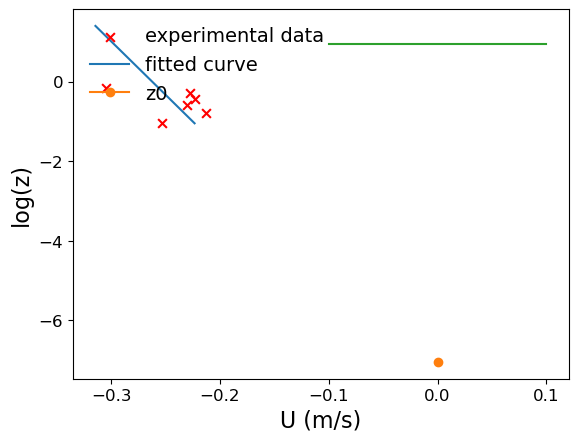

In [13]:
#t_idx = 29
t_idx = 85
#t_idx = 44
#t_idx = 30

z = aqd.bindist + aqd.transducer_offset_from_bottom
x= np.log(z).to_numpy()
y=aqd.al.to_numpy()
y[9109]

y_nonans = y[t_idx][~np.isnan(y[t_idx])]
y_nonans
x_nonans = x[~np.isnan(y[t_idx])]

a0,a1,r2 = calculate_linear_regression_coef(x_nonans,y_nonans)

print("a0 is",a0,", and a1 is",a1,", and r2 is",r2)

kappa = 0.41
u_star = a1 * kappa
print("Fitted shear velocity is ", round(u_star,3), " m/s.")

z0 = np.exp(a0*kappa/(-u_star))
ks = np.exp(a0* kappa/(-u_star))*30
print("Fitted z0 is ", round(z0,4), " m.")
print("Fitted roughness is ", round(ks,4), " m.")

U_pre = u_star/kappa*np.log(z/ks*30)

plt.scatter( y[t_idx],np.log(z), c = "r", marker = "x", s = 40, label='experimental data') 
plt.plot( U_pre,np.log(z), label='fitted curve')
plt.plot(0,np.log(z0),marker='o',label='z0')
plt.plot([-0.1,0.1],[aqd.water_surface_elevation[t_idx], aqd.water_surface_elevation[t_idx]]-aqd.height_above_geopotential_datum)
#plt.plot([-0.1,0.1],[aqd.bottom_fifth[t_idx], aqd.bottom_fifth[t_idx]])

plt.xlabel('U (m/s)',fontsize=16) 
plt.ylabel('log(z)' ,fontsize=16) 

#show the ticks on both axes and set the font size 
plt.tick_params(axis='both', which='major', labelsize=12)

plt.legend(loc='upper left',fontsize=14,frameon=False)

ax = plt.gca()
#ax.set_ylim([0,3.5])

plt.plot()

In [14]:

z = aqd.bindist + aqd.transducer_offset_from_bottom
x= np.log(z).to_numpy()
y=aqd.al.to_numpy()

kappa = 0.41

make_plot = 0

aqd['u_star'] = xr.full_like(aqd.P_1,0)
aqd['z0'] = xr.full_like(aqd.P_1,0)
aqd['r2'] = xr.full_like(aqd.P_1,0)

for ti in range(aqd.time.size):
    
    y_nonans = y[ti][~np.isnan(y[ti])]
    x_nonans = x[~np.isnan(y[ti])]
    a0,a1,r2 = calculate_linear_regression_coef(x_nonans,y_nonans)
    u_star = a1 * kappa
    z0 = np.exp(a0*kappa/(-u_star))
    ks = np.exp(a0* kappa/(-u_star))*30
    U_pre = u_star/kappa*np.log(z/ks*30)

    aqd.u_star[ti] = u_star
    aqd.z0[ti] = z0
    aqd.r2[ti] = r2

    if make_plot:
        print("ti=",ti,", a0 is",a0,", and a1 is",a1,", and r2 is",r2)
        print("Fitted shear velocity is ", round(u_star,3), " m/s.")
        print("Fitted z0 is ", round(z0,4), " m.")
        print("Fitted roughness is ", round(ks,4), " m.")

        plt.scatter( y[t_idx],z, c = "r", marker = "x", s = 40, label='experimental data') 
        plt.plot( U_pre,z, label='fitted curve')
        plt.plot(0,z0,marker='o',label='z0')
        plt.xlabel('U (m/s)',fontsize=16) 
        plt.ylabel('z (m)',fontsize=16) 
        
        #show the ticks on both axes and set the font size 
        plt.tick_params(axis='both', which='major', labelsize=12)

        plt.legend(loc='upper left',fontsize=14,frameon=False)

        plt.plot()
        


C:\Users\rallen\AppData\Local\Temp\1\ipykernel_40516\3391634493.py:18: RuntimeWarning: invalid value encountered in scalar divide
  a1 = (n*sxy - sx*sy)/(n*sx2 - sx**2)
C:\Users\rallen\AppData\Local\Temp\1\ipykernel_40516\3391634493.py:21: RuntimeWarning: invalid value encountered in scalar divide
  r2 = ((n*sxy-sx*sy)/np.sqrt(n*sx2-sx**2)/np.sqrt(n*sy2-sy**2))**2;
C:\Users\rallen\AppData\Local\Temp\1\ipykernel_40516\1090548870.py:19: RuntimeWarning: overflow encountered in exp
  z0 = np.exp(a0*kappa/(-u_star))
C:\Users\rallen\AppData\Local\Temp\1\ipykernel_40516\1090548870.py:20: RuntimeWarning: overflow encountered in exp
  ks = np.exp(a0* kappa/(-u_star))*30
C:\Users\rallen\AppData\Local\mambaforge\envs\herringriver\Lib\site-packages\xarray\core\computation.py:825: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
C:\Users\rallen\AppData\Local\Temp\1\ipykernel_40516\3391634493.py:19: RuntimeWarning: invalid value encountered in scalar divide
  a0 = 

In [15]:
aqd['u_star'] = aqd.u_star.assign_attrs(long_name = 'Friction velocity', units = 'm s-1', note = 'Friction velocity computed from law of the wall', standard_name = 'na')
aqd['z0'] = aqd.z0.assign_attrs(long_name = 'hydrodynamic roughness', units = 'm', note = 'hydrodynamic roughness computed from law of the wall', standard_name = 'na')
aqd['r2'] = aqd.r2.assign_attrs(long_name = 'r^2', units = '-', note = 'correlation coefficient from law of the wall computation', standard_name = 'na')

aqd

<xarray.Dataset> Size: 38MB
Dimensions:                  (z: 38, time: 9110, bindist: 38, latitude: 1,
                              longitude: 1, depth: 38)
Coordinates:
  * z                        (z) float64 304B -1.85 -1.75 -1.65 ... 1.75 1.85
  * time                     (time) datetime64[ns] 73kB 2018-11-12T16:46:00 ....
  * bindist                  (bindist) float64 304B 0.2 0.3 0.4 ... 3.7 3.8 3.9
  * latitude                 (latitude) float64 8B 41.92
  * longitude                (longitude) float64 8B -70.06
  * depth                    (depth) float64 304B 1.748 1.648 ... -1.852 -1.952
Data variables: (12/37)
    Bat_106                  (time) float64 73kB 10.9 10.9 10.9 ... 10.7 10.7
    Hdg_1215                 (time) float64 73kB 141.3 141.5 ... 140.8 141.2
    Ptch_1216                (time) float64 73kB 0.8 0.7 0.7 0.7 ... 0.5 0.5 0.6
    Roll_1217                (time) float64 73kB 3.0 3.0 3.0 2.9 ... 2.8 3.0 2.7
    P_1                      (time) float64 73kB 2.473 2.593 ... 3.033 2.913
    Tx_1211                  (time) float64 73kB 8.1 8.16 8.21 ... 0.91 0.99
    ...                       ...
    wh_4061                  (time) float64 73kB nan nan nan nan ... nan nan nan
    kh                       (time) float64 73kB nan nan nan nan ... nan nan nan
    ubr                      (time) float64 73kB nan nan nan nan ... nan nan nan
    u_star                   (time) float64 73kB 0.0129 0.006356 ... -0.003955
    z0                       (time) float64 73kB 0.126 0.006559 ... 3.138e-05
    r2                       (time) float64 73kB 0.1233 0.04084 ... 0.01509
Attributes: (12/119)
    title:                            Time-series measurements of oceanograph...
    SciPi:                            N. Ganju
    PROJECT:                          USGS Coastal and Marine Hazards and Res...
    EXPERIMENT:                       NRPP Cape Cod
    DESCRIPTION:                      Outer Channel site, Herring River, Well...
    DATA_SUBTYPE:                     MOORED
    ...                               ...
    center_first_bin:                 0.2
    instrument_type:                  Nortek Aquadopp Profiler
    nominal_instrument_depth:         1.94
    DELTA_T:                          900
    start_time:                       2018-11-12T16:46:00.000000000
    stop_time:                        2019-02-15T14:01:00.000000000

C:\Users\rallen\AppData\Local\mambaforge\envs\herringriver\Lib\site-packages\matplotlib\scale.py:255: RuntimeWarning: overflow encountered in power
  return np.power(self.base, values)


Text(0, 0.5, 'z_0 (m)')

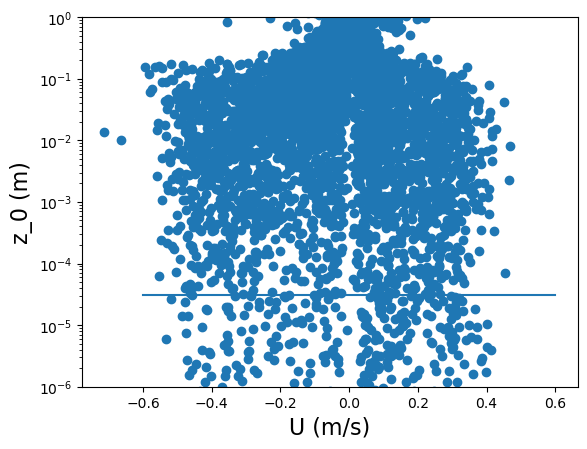

In [16]:
plt.scatter(aqd.daal,aqd.z0)
plt.plot([-0.6,0.6],[ks/30, ks/30])
#plt.ylim(0.000001,1000)
plt.yscale('log')
plt.ylim([0.000001,1])
plt.xlabel('U (m/s)',fontsize=16) 
plt.ylabel('z_0 (m)',fontsize=16) 


Text(0, 0.5, 'ln(mab)')

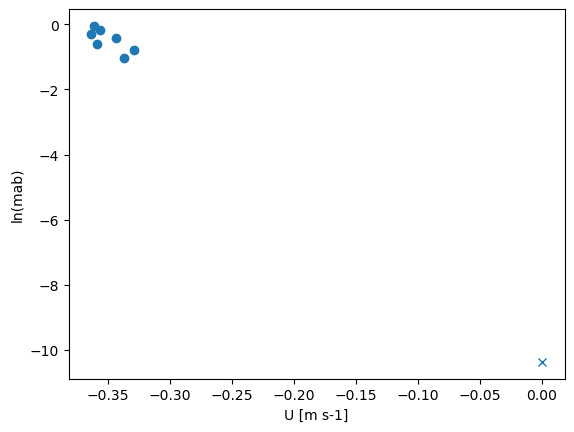

In [17]:
# try a second time, using a fixed z0
#aqd.al[1,]
plt.scatter(aqd.al[30,],np.log(aqd.bindist + aqd.transducer_offset_from_bottom))
plt.plot(0,np.log(z0),'x')
plt.xlabel('U [m s-1]')
plt.ylabel('ln(mab)')

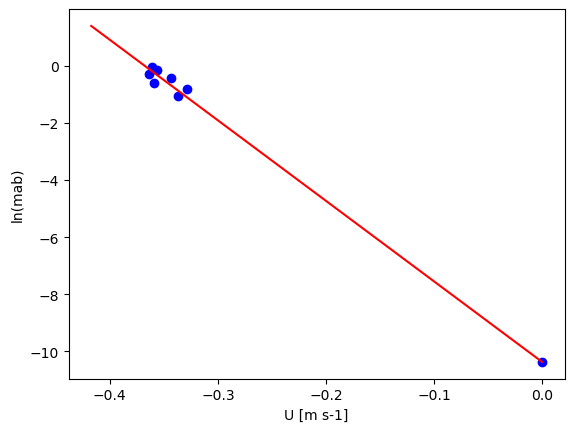

-0.01453750704264409

In [18]:
#u = aqd.al[30,].to_numpy
#lnz = np.log(aqd.bindist + aqd.transducer_offset_from_bottom).to_numpy
#lnz
#np.linalg.lstsq(u,lnz)

z = aqd.bindist + aqd.transducer_offset_from_bottom
x = np.log(z).to_numpy()
x = np.append(np.log(z0),x)
x

y = aqd.al[30,].to_numpy()
y = np.append(0,y)
y

x = x[:,np.newaxis]
x = x-x[0]
x

#y = y[:,np.newaxis]
x[0:7]
y[0:7]
a,_,_,_ = np.linalg.lstsq(x[0:7],y[0:7],rcond=None)
#a,_,_,_ = np.linalg.lstsq(y[0:7],x[0:7],rcond=None)
a

plt.plot(y,x+np.log(z0),'bo')
plt.plot(a*x,x+np.log(z0),'r-')
plt.xlabel('U [m s-1]')
plt.ylabel('ln(mab)')
plt.show()

ustar = a*kappa
ustar[0]

In [19]:
# compute ustar assuming rough and D50 = 500 microns
d50 = 500*1e-6
#d50 = 1000*1e-6
d50
ks = d50*2.5
ks
z0 = ks/30
z0

z = aqd.bindist + aqd.transducer_offset_from_bottom
x= np.log(z).to_numpy()
y=aqd.al.to_numpy()

kappa = 0.41

make_plot = 0

aqd['u_star_rough_D50_500'] = xr.full_like(aqd.P_1,0)
#aqd['u_star_rough_D50_1000'] = xr.full_like(aqd.P_1,0)

ti = 0

for ti in range(aqd.time.size):
    
    y_nonans = y[ti][~np.isnan(y[ti])]
    x_nonans = x[~np.isnan(y[ti])]
    y_nonans = np.append(0,y_nonans)
    x_nonans = np.append(np.log(z0),x_nonans)

    x_nonans = x_nonans[:,np.newaxis]
    x_nonans = x_nonans-x_nonans[0]

    a,_,_,_ = np.linalg.lstsq(x_nonans,y_nonans,rcond=None)

    u_star = a * kappa

    aqd.u_star_rough_D50_500[ti] = u_star[0]
#    aqd.u_star_rough_D50_1000[ti] = u_star[0]



In [20]:
# compute ustar assuming rough and D50 = 1000 microns
d50 = 1000*1e-6
d50
ks = d50*2.5
ks
z0 = ks/30
z0

z = aqd.bindist + aqd.transducer_offset_from_bottom
x= np.log(z).to_numpy()
y=aqd.al.to_numpy()

kappa = 0.41

make_plot = 0

#aqd['u_star_rough_D50_500'] = xr.full_like(aqd.P_1,0)
aqd['u_star_rough_D50_1000'] = xr.full_like(aqd.P_1,0)

ti = 0

for ti in range(aqd.time.size):
    
    y_nonans = y[ti][~np.isnan(y[ti])]
    x_nonans = x[~np.isnan(y[ti])]
    y_nonans = np.append(0,y_nonans)
    x_nonans = np.append(np.log(z0),x_nonans)

    x_nonans = x_nonans[:,np.newaxis]
    x_nonans = x_nonans-x_nonans[0]

    a,_,_,_ = np.linalg.lstsq(x_nonans,y_nonans,rcond=None)

    u_star = a * kappa

#    aqd.u_star_rough_D50_500[ti] = u_star[0]
    aqd.u_star_rough_D50_1000[ti] = u_star[0]



In [21]:
aqd

<xarray.Dataset> Size: 38MB
Dimensions:                  (z: 38, time: 9110, bindist: 38, latitude: 1,
                              longitude: 1, depth: 38)
Coordinates:
  * z                        (z) float64 304B -1.85 -1.75 -1.65 ... 1.75 1.85
  * time                     (time) datetime64[ns] 73kB 2018-11-12T16:46:00 ....
  * bindist                  (bindist) float64 304B 0.2 0.3 0.4 ... 3.7 3.8 3.9
  * latitude                 (latitude) float64 8B 41.92
  * longitude                (longitude) float64 8B -70.06
  * depth                    (depth) float64 304B 1.748 1.648 ... -1.852 -1.952
Data variables: (12/39)
    Bat_106                  (time) float64 73kB 10.9 10.9 10.9 ... 10.7 10.7
    Hdg_1215                 (time) float64 73kB 141.3 141.5 ... 140.8 141.2
    Ptch_1216                (time) float64 73kB 0.8 0.7 0.7 0.7 ... 0.5 0.5 0.6
    Roll_1217                (time) float64 73kB 3.0 3.0 3.0 2.9 ... 2.8 3.0 2.7
    P_1                      (time) float64 73kB 2.473 2.593 ... 3.033 2.913
    Tx_1211                  (time) float64 73kB 8.1 8.16 8.21 ... 0.91 0.99
    ...                       ...
    ubr                      (time) float64 73kB nan nan nan nan ... nan nan nan
    u_star                   (time) float64 73kB 0.0129 0.006356 ... -0.003955
    z0                       (time) float64 73kB 0.126 0.006559 ... 3.138e-05
    r2                       (time) float64 73kB 0.1233 0.04084 ... 0.01509
    u_star_rough_D50_500     (time) float64 73kB 0.002743 0.003209 ... -0.004063
    u_star_rough_D50_1000    (time) float64 73kB 0.002946 0.003443 ... -0.004354
Attributes: (12/119)
    title:                            Time-series measurements of oceanograph...
    SciPi:                            N. Ganju
    PROJECT:                          USGS Coastal and Marine Hazards and Res...
    EXPERIMENT:                       NRPP Cape Cod
    DESCRIPTION:                      Outer Channel site, Herring River, Well...
    DATA_SUBTYPE:                     MOORED
    ...                               ...
    center_first_bin:                 0.2
    instrument_type:                  Nortek Aquadopp Profiler
    nominal_instrument_depth:         1.94
    DELTA_T:                          900
    start_time:                       2018-11-12T16:46:00.000000000
    stop_time:                        2019-02-15T14:01:00.000000000

(-0.1, 0.1)

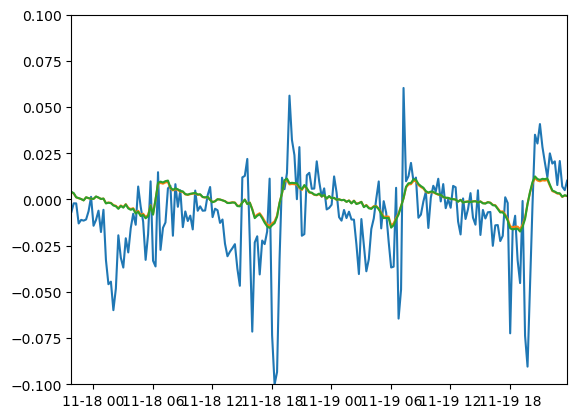

In [22]:

plt.plot(aqd.time,aqd.u_star)
plt.plot(aqd.time,aqd.u_star_rough_D50_500)
plt.plot(aqd.time,aqd.u_star_rough_D50_1000)
plt.xlim(aqd.time[500],aqd.time[700])
plt.ylim([-0.1,0.1])

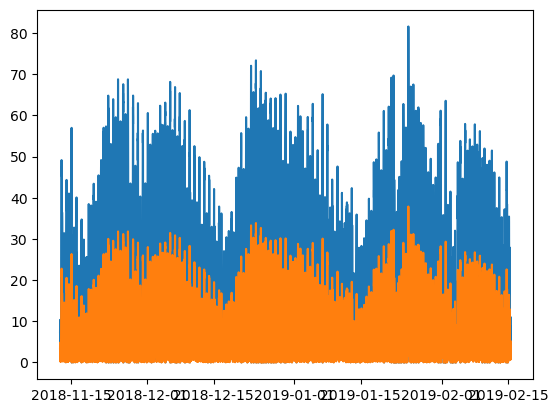

In [23]:
# check to see if flow is hydrodynamically rough, smooth, or transitional
nu = 1e-6 # m2 s-1
d50 = 1000*1e-6
ks = d50*2.5
plt.plot(aqd.time,np.abs(aqd.u_star_rough_D50_1000*ks/nu))
d50 = 500*1e-6
ks = d50*2.5
plt.plot(aqd.time,np.abs(aqd.u_star_rough_D50_500*ks/nu))

# whether we use d50 of 500 or 1000 microns, we're pretty much never in hydrodynamically rough flows!  It is transitional or smooth, in all cases
# therefore, we need to use the full version of equation 23a, from Soulsby to get z0

# but, as stated on page 47, assuming the flow is hydrodynamically rough makes less than 10% error in the calculation of u* for all u* above the threshold of motion of grains larger than 60 microns



To compute bed shear stress from currents and waves, we need z0.  To figure out z0, we need to know if flow is hydrodynamically rough, smooth, or transitional. 

Compute: u_star ks/nu - if > 70, rough; if < 5, smooth, if 5 < u_star ks/nu < 70, transitional

We assume that 500 microns < D50 < 1000 microns, based on data from NPS.

Soulsby eq 24 says ks = 2.5*d50.  We assume the bed is rough, and compute z0 = ks/30.

So, we took U(z) = u*/kappa ln (z/z0) (eq 22), assigned z0 = 500 and 1000 microns at U(z0) = 0, and computed u* via a linear fit between u(z) = u*/kappa * (ln(z)-ln(z0)) = (u*/kappa) *x, where x = ln(z)-ln(z0).  That lets us find u_star, for both cases of z0.

Then, we compute u_star ks/nu, which is smooth and transitional for all times, whether D50 is 500 or 1000 microns (never rough).  This implies that we have to use equation 23a to compute z0, via z0 = ks/30 (1-exp(-u_star ks/27 nu)) + nu/9 u_star, or via z0 = ks/30 + nu/9 u_star (eq 23 b).  

We find above that ustar doesn't vary much.  So, we'll use the ustar assuming D50 = 500 microns, and compute z0 from the full equation.  Then we'll do it again assuming D50 = 1000 microns.

In [24]:
d50 = 500*1e-6
ks = d50*2.5
aqd['z0_full_eqn_D50_500'] = (ks/30)*(1-np.exp(-np.fabs(aqd.u_star_rough_D50_500)*ks/(27*nu)))+(nu/(9*np.fabs(aqd.u_star_rough_D50_500)))

In [25]:
d50 = 1000*1e-6
ks = d50*2.5
aqd['z0_full_eqn_D50_1000'] = (ks/30)*(1-np.exp(-np.fabs(aqd.u_star_rough_D50_1000)*ks/(27*nu)))+(nu/(9*np.fabs(aqd.u_star_rough_D50_1000)))

(17852.906944444443, 17854.99027777778)

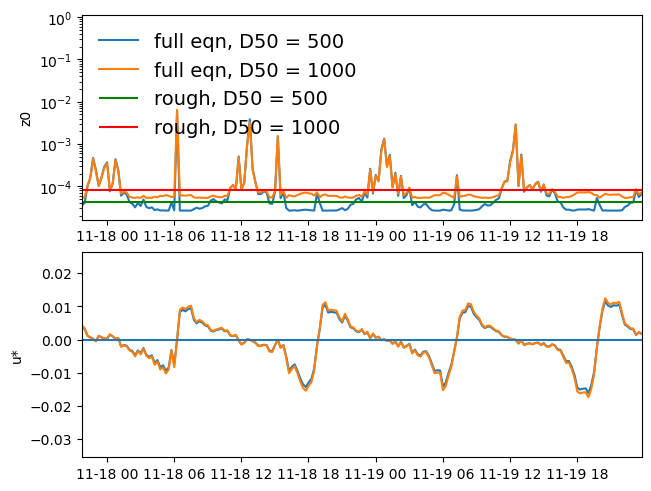

In [26]:

fig,axs = plt.subplots(2,1,layout='constrained')

axs[0].plot(aqd.time,aqd.z0_full_eqn_D50_500,label='full eqn, D50 = 500')
axs[0].plot(aqd.time,aqd.z0_full_eqn_D50_1000,label='full eqn, D50 = 1000')
axs[0].set_yscale("log")
axs[0].hlines(500*1e-6*2.5/30,aqd.time[0],aqd.time[-1],label='rough, D50 = 500',color='green')
axs[0].hlines(1000*1e-6*2.5/30,aqd.time[0],aqd.time[-1],label='rough, D50 = 1000',color='red')
axs[0].set_xlim(aqd.time[500],aqd.time[700])
axs[0].set_ylabel('z0')
axs[0].legend(loc='upper left',fontsize=14,frameon=False)

axs[1].plot(aqd.time,aqd.u_star_rough_D50_500)
axs[1].plot(aqd.time,aqd.u_star_rough_D50_1000)
axs[1].set_ylabel('u*')
axs[1].hlines(0,aqd.time[0],aqd.time[-1])
axs[1].set_xlim(aqd.time[500],aqd.time[700])


In [27]:
# compute drag coefficient
aqd['Cd_from_D50_500'] = (kappa/(1+np.log(aqd.z0_full_eqn_D50_500/aqd.water_depth)))**2
aqd['Cd_from_D50_1000'] = (kappa/(1+np.log(aqd.z0_full_eqn_D50_1000/aqd.water_depth)))**2

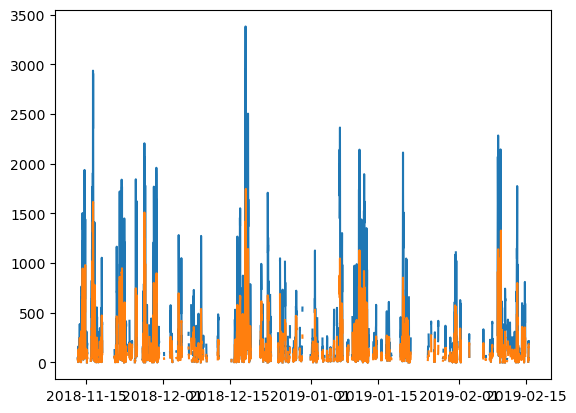

In [28]:
# to compute fw, we need A, which relies on the wave calculations we did earlier
aqd['A'] = aqd.ubr*aqd.wp_peak/(2*np.pi)
plt.plot(aqd.time,aqd.A/aqd.z0_full_eqn_D50_500)
plt.plot(aqd.time,aqd.A/aqd.z0_full_eqn_D50_1000)



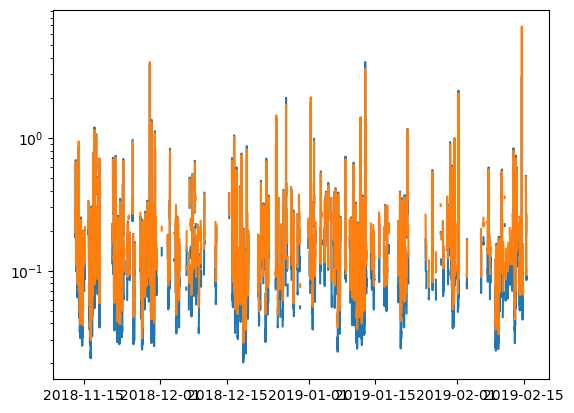

In [29]:
# compute bed friction factor
# use equation 62a from Soulsby
aqd['fw_from_D50_500'] = 1.39*((aqd.A/aqd.z0_full_eqn_D50_500)**-0.52)
aqd['fw_from_D50_1000'] = 1.39*((aqd.A/aqd.z0_full_eqn_D50_1000)**-0.52)

plt.plot(aqd.time,aqd.fw_from_D50_500)
plt.plot(aqd.time,aqd.fw_from_D50_1000)
plt.yscale("log")


In [30]:
# compute bed shear stress from waves, following Soulsby eq 57: tauw = 1/2 rho fw Uw^2
aqd['tauw_from_D50_500'] = 0.5*rho*aqd.fw_from_D50_500*(aqd.ubr**2)
aqd['tauw_from_D50_1000'] = 0.5*rho*aqd.fw_from_D50_1000*(aqd.ubr**2)


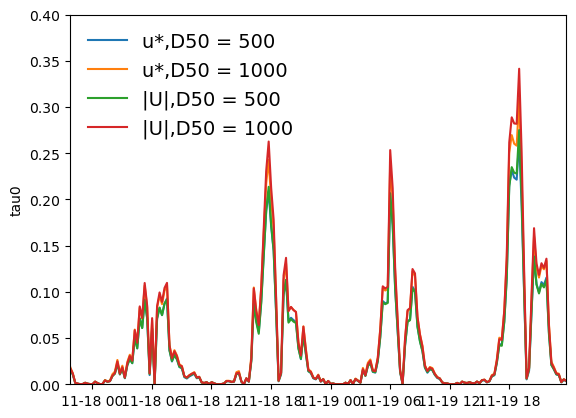

In [31]:
# compute bed shear stress from currents, using the ustar estimate (eq 1b): tau_0 = rho *ustar^2
aqd['tau0_from_ustar_D50_500'] = rho*(aqd.u_star_rough_D50_500)**2
aqd['tau0_from_ustar_D50_1000'] = rho*(aqd.u_star_rough_D50_1000)**2
# compute bed shear stress from currents, using the mean velocity estimate and Cd: tau_0 = rho *Cd*U^2
aqd['tau0_from_Ubar_D50_500'] = rho*aqd.Cd_from_D50_500*(aqd.daal**2)
aqd['tau0_from_Ubar_D50_1000'] = rho*aqd.Cd_from_D50_1000*(aqd.daal**2)

plt.plot(aqd.time,aqd.tau0_from_ustar_D50_500,label='u*,D50 = 500')
plt.plot(aqd.time,aqd.tau0_from_ustar_D50_1000,label='u*,D50 = 1000')
plt.plot(aqd.time,aqd.tau0_from_Ubar_D50_500,label='|U|,D50 = 500')
plt.plot(aqd.time,aqd.tau0_from_Ubar_D50_1000,label='|U|,D50 = 1000')
plt.xlim(aqd.time[500],aqd.time[700])
plt.ylabel('tau0')
plt.ylim(0, 0.4)
plt.legend(loc='upper left',fontsize=14,frameon=False)


C:\Users\rallen\AppData\Local\mambaforge\envs\herringriver\Lib\site-packages\matplotlib\axes\_base.py:2923: RuntimeWarning: overflow encountered in scalar add
  x0, x1 = inverse_trans.transform([x0t - delta, x1t + delta])


(0.0, 5.0)

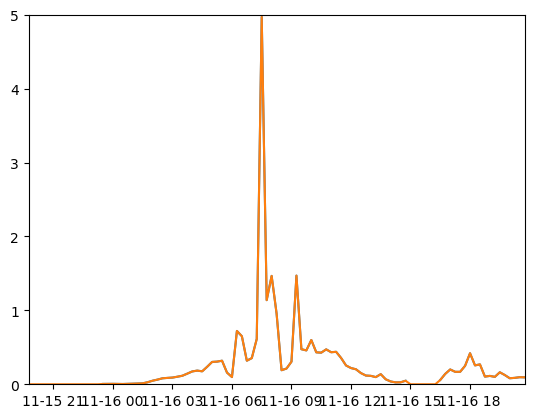

In [58]:
np.nan_to_num(aqd.tauw_from_D50_500)
#plt.plot(np.nan_to_num(aqd.tauw_from_D50_500))
plt.plot(aqd.time,aqd.tauw_from_D50_500)
plt.plot(aqd.time,np.nan_to_num(aqd.tauw_from_D50_500))
plt.xlim(aqd.time[300],aqd.time[400])
plt.ylim(0,5)


In [57]:
# compute bed shear stress from currents and waves, using the different estimates, and Soulsby DATA2 method
#taumean = tauc*(1+1.2*(tauw/(tauc+tauw))**3.2)
#np.nan_to_num(aqd.tauw_from_D50_500)
aqd['taumean_from_D50_500_ustar'] = aqd.tau0_from_ustar_D50_500*(1+1.2*(np.nan_to_num(aqd.tauw_from_D50_500)/(aqd.tau0_from_ustar_D50_500+np.nan_to_num(aqd.tauw_from_D50_500)))**3.2)
aqd['taumean_from_D50_1000_ustar'] = aqd.tau0_from_ustar_D50_1000*(1+1.2*(np.nan_to_num(aqd.tauw_from_D50_1000)/(aqd.tau0_from_ustar_D50_1000+np.nan_to_num(aqd.tauw_from_D50_1000)))**3.2)
aqd['taumean_from_D50_500_Ubar'] = aqd.tau0_from_Ubar_D50_500*(1+1.2*(np.nan_to_num(aqd.tauw_from_D50_500)/(aqd.tau0_from_Ubar_D50_500+np.nan_to_num(aqd.tauw_from_D50_500)))**3.2)
aqd['taumean_from_D50_1000_Ubar'] = aqd.tau0_from_Ubar_D50_1000*(1+1.2*(np.nan_to_num(aqd.tauw_from_D50_1000)/(aqd.tau0_from_Ubar_D50_1000+np.nan_to_num(aqd.tauw_from_D50_1000)))**3.2)


C:\Users\rallen\AppData\Local\mambaforge\envs\herringriver\Lib\site-packages\xarray\core\computation.py:825: RuntimeWarning: invalid value encountered in divide
  result_data = func(*input_data)


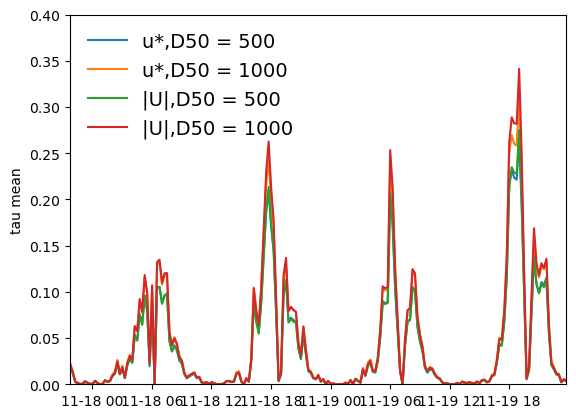

In [33]:
plt.plot(aqd.time,aqd.taumean_from_D50_500_ustar,label='u*,D50 = 500')
plt.plot(aqd.time,aqd.taumean_from_D50_1000_ustar,label='u*,D50 = 1000')
plt.plot(aqd.time,aqd.taumean_from_D50_500_Ubar,label='|U|,D50 = 500')
plt.plot(aqd.time,aqd.taumean_from_D50_1000_Ubar,label='|U|,D50 = 1000')
plt.xlim(aqd.time[500],aqd.time[700])
plt.ylabel('tau mean')
plt.ylim(0, 0.4)
plt.legend(loc='upper left',fontsize=14,frameon=False)


In [34]:
# taumax = ((taumean + tauw*np.cos(phi*(2*np.pi)/360))**2 + (tauw*np.sin(phi*(2*np.pi)/360))**2)**0.5
# we don't know the angle between waves and currents.  try both phi = 0 and phi = 90
phi = 0
aqd['taumax_from_D50_500_ustar_phi0'] = ((aqd.taumean_from_D50_500_ustar + np.nan_to_num(aqd.tauw_from_D50_500)*np.cos(phi*(2*np.pi)/360))**2 + (np.nan_to_num(aqd.tauw_from_D50_500)*np.sin(phi*(2*np.pi)/360))**2)**0.5
aqd['taumax_from_D50_1000_ustar_phi0'] = ((aqd.taumean_from_D50_1000_ustar + np.nan_to_num(aqd.tauw_from_D50_1000)*np.cos(phi*(2*np.pi)/360))**2 + (np.nan_to_num(aqd.tauw_from_D50_1000)*np.sin(phi*(2*np.pi)/360))**2)**0.5
aqd['taumax_from_D50_500_Ubar_phi0'] = ((aqd.taumean_from_D50_500_Ubar + np.nan_to_num(aqd.tauw_from_D50_500)*np.cos(phi*(2*np.pi)/360))**2 + (np.nan_to_num(aqd.tauw_from_D50_500)*np.sin(phi*(2*np.pi)/360))**2)**0.5
aqd['taumax_from_D50_1000_Ubar_phi0'] = ((aqd.taumean_from_D50_1000_Ubar + np.nan_to_num(aqd.tauw_from_D50_1000)*np.cos(phi*(2*np.pi)/360))**2 + (np.nan_to_num(aqd.tauw_from_D50_1000)*np.sin(phi*(2*np.pi)/360))**2)**0.5
phi = 90
aqd['taumax_from_D50_500_ustar_phi90'] = ((aqd.taumean_from_D50_500_ustar + np.nan_to_num(aqd.tauw_from_D50_500)*np.cos(phi*(2*np.pi)/360))**2 + (np.nan_to_num(aqd.tauw_from_D50_500)*np.sin(phi*(2*np.pi)/360))**2)**0.5
aqd['taumax_from_D50_1000_ustar_phi90'] = ((aqd.taumean_from_D50_1000_ustar + np.nan_to_num(aqd.tauw_from_D50_1000)*np.cos(phi*(2*np.pi)/360))**2 + (np.nan_to_num(aqd.tauw_from_D50_1000)*np.sin(phi*(2*np.pi)/360))**2)**0.5
aqd['taumax_from_D50_500_Ubar_phi90'] = ((aqd.taumean_from_D50_500_Ubar + np.nan_to_num(aqd.tauw_from_D50_500)*np.cos(phi*(2*np.pi)/360))**2 + (np.nan_to_num(aqd.tauw_from_D50_500)*np.sin(phi*(2*np.pi)/360))**2)**0.5
aqd['taumax_from_D50_1000_Ubar_phi90'] = ((aqd.taumean_from_D50_1000_Ubar + np.nan_to_num(aqd.tauw_from_D50_1000)*np.cos(phi*(2*np.pi)/360))**2 + (np.nan_to_num(aqd.tauw_from_D50_1000)*np.sin(phi*(2*np.pi)/360))**2)**0.5



C:\Users\rallen\AppData\Local\Temp\1\ipykernel_40516\1343319049.py:9: RuntimeWarning: overflow encountered in square
  aqd['taumax_from_D50_500_ustar_phi90'] = ((aqd.taumean_from_D50_500_ustar + np.nan_to_num(aqd.tauw_from_D50_500)*np.cos(phi*(2*np.pi)/360))**2 + (np.nan_to_num(aqd.tauw_from_D50_500)*np.sin(phi*(2*np.pi)/360))**2)**0.5
C:\Users\rallen\AppData\Local\Temp\1\ipykernel_40516\1343319049.py:10: RuntimeWarning: overflow encountered in square
  aqd['taumax_from_D50_1000_ustar_phi90'] = ((aqd.taumean_from_D50_1000_ustar + np.nan_to_num(aqd.tauw_from_D50_1000)*np.cos(phi*(2*np.pi)/360))**2 + (np.nan_to_num(aqd.tauw_from_D50_1000)*np.sin(phi*(2*np.pi)/360))**2)**0.5
C:\Users\rallen\AppData\Local\Temp\1\ipykernel_40516\1343319049.py:11: RuntimeWarning: overflow encountered in square
  aqd['taumax_from_D50_500_Ubar_phi90'] = ((aqd.taumean_from_D50_500_Ubar + np.nan_to_num(aqd.tauw_from_D50_500)*np.cos(phi*(2*np.pi)/360))**2 + (np.nan_to_num(aqd.tauw_from_D50_500)*np.sin(phi*(2*np.p

In [35]:
aqd

<xarray.Dataset> Size: 40MB
Dimensions:                           (z: 38, time: 9110, bindist: 38,
                                       latitude: 1, longitude: 1, depth: 38)
Coordinates:
  * z                                 (z) float64 304B -1.85 -1.75 ... 1.75 1.85
  * time                              (time) datetime64[ns] 73kB 2018-11-12T1...
  * bindist                           (bindist) float64 304B 0.2 0.3 ... 3.8 3.9
  * latitude                          (latitude) float64 8B 41.92
  * longitude                         (longitude) float64 8B -70.06
  * depth                             (depth) float64 304B 1.748 ... -1.952
Data variables: (12/64)
    Bat_106                           (time) float64 73kB 10.9 10.9 ... 10.7
    Hdg_1215                          (time) float64 73kB 141.3 141.5 ... 141.2
    Ptch_1216                         (time) float64 73kB 0.8 0.7 ... 0.5 0.6
    Roll_1217                         (time) float64 73kB 3.0 3.0 ... 3.0 2.7
    P_1                               (time) float64 73kB 2.473 2.593 ... 2.913
    Tx_1211                           (time) float64 73kB 8.1 8.16 ... 0.91 0.99
    ...                                ...
    taumax_from_D50_500_Ubar_phi0     (time) float64 73kB 0.008099 ... 0.01693
    taumax_from_D50_1000_Ubar_phi0    (time) float64 73kB 0.008504 ... 0.01844
    taumax_from_D50_500_ustar_phi90   (time) float64 73kB 0.007728 ... 0.01695
    taumax_from_D50_1000_ustar_phi90  (time) float64 73kB 0.00891 ... 0.01947
    taumax_from_D50_500_Ubar_phi90    (time) float64 73kB 0.008099 ... 0.01693
    taumax_from_D50_1000_Ubar_phi90   (time) float64 73kB 0.008504 ... 0.01844
Attributes: (12/119)
    title:                            Time-series measurements of oceanograph...
    SciPi:                            N. Ganju
    PROJECT:                          USGS Coastal and Marine Hazards and Res...
    EXPERIMENT:                       NRPP Cape Cod
    DESCRIPTION:                      Outer Channel site, Herring River, Well...
    DATA_SUBTYPE:                     MOORED
    ...                               ...
    center_first_bin:                 0.2
    instrument_type:                  Nortek Aquadopp Profiler
    nominal_instrument_depth:         1.94
    DELTA_T:                          900
    start_time:                       2018-11-12T16:46:00.000000000
    stop_time:                        2019-02-15T14:01:00.000000000

(17850.82361111111, 17851.86527777778)

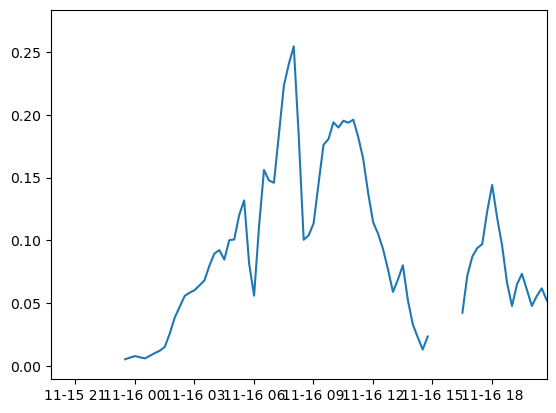

In [36]:
plt.plot(aqd.time,aqd.ubr)
plt.xlim(aqd.time[300],aqd.time[400])


(0.0, 2.0)

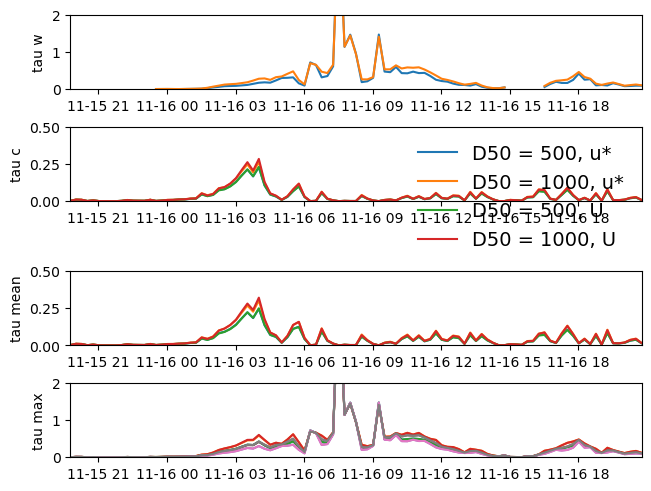

In [37]:
# look at all of these together!

fig,axs = plt.subplots(4,1,layout='constrained')

axs[0].plot(aqd.time,aqd.tauw_from_D50_500,label='D50 = 500')
axs[0].plot(aqd.time,aqd.tauw_from_D50_1000,label='D50 = 1000')
#axs[0].set_yscale("log")
axs[0].set_xlim(aqd.time[300],aqd.time[400])
axs[0].set_ylabel('tau w')
#axs[0].legend(loc='upper left',fontsize=14,frameon=False)
axs[0].set_ylim(0,2)

axs[1].plot(aqd.time,aqd.tau0_from_ustar_D50_500,label='D50 = 500, u*')
axs[1].plot(aqd.time,aqd.tau0_from_ustar_D50_1000,label='D50 = 1000, u*')
axs[1].plot(aqd.time,aqd.tau0_from_Ubar_D50_500,label='D50 = 500, U')
axs[1].plot(aqd.time,aqd.tau0_from_Ubar_D50_1000,label='D50 = 1000, U')
axs[1].set_xlim(aqd.time[300],aqd.time[400])
axs[1].set_ylabel('tau c')
axs[1].legend(loc='upper right',fontsize=14,frameon=False)
axs[1].set_ylim(0,0.5)

axs[2].plot(aqd.time,aqd.taumean_from_D50_500_ustar,label='D50 = 500, u*')
axs[2].plot(aqd.time,aqd.taumean_from_D50_1000_ustar,label='D50 = 1000, u*')
axs[2].plot(aqd.time,aqd.taumean_from_D50_500_Ubar,label='D50 = 500, U')
axs[2].plot(aqd.time,aqd.taumean_from_D50_1000_Ubar,label='D50 = 1000, U')
axs[2].set_xlim(aqd.time[300],aqd.time[400])
axs[2].set_ylabel('tau mean')
axs[2].set_ylim(0,0.5)

axs[3].plot(aqd.time,aqd.taumax_from_D50_500_ustar_phi0,label='D50 = 500, u*, phi 0')
axs[3].plot(aqd.time,aqd.taumax_from_D50_1000_ustar_phi0,label='D50 = 500, u*, phi 0')
axs[3].plot(aqd.time,aqd.taumax_from_D50_500_Ubar_phi0,label='D50 = 500, u*, phi 0')
axs[3].plot(aqd.time,aqd.taumax_from_D50_1000_Ubar_phi0,label='D50 = 500, u*, phi 0')
axs[3].plot(aqd.time,aqd.taumax_from_D50_500_ustar_phi90,label='D50 = 500, u*, phi 90')
axs[3].plot(aqd.time,aqd.taumax_from_D50_1000_ustar_phi90,label='D50 = 500, u*, phi 90')
axs[3].plot(aqd.time,aqd.taumax_from_D50_500_Ubar_phi90,label='D50 = 500, u*, phi 90')
axs[3].plot(aqd.time,aqd.taumax_from_D50_1000_Ubar_phi90,label='D50 = 500, u*, phi 90')
axs[3].set_xlim(aqd.time[300],aqd.time[400])
axs[3].set_ylabel('tau max')
axs[3].set_ylim(0,2)